        TextBlob | vaderSentiment | nltk | re | bs4 | CountVectorizer | Word2Vec 
        
        | TF-IDF | Pipeline | FeatrueUnion

# Sentiment Analysis TextBlob and VaderSentiment
            
            TextBlob | vaderSentiment | np | pd | sklearn

   [TextBlob](http://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis): build on nstk
   
   
   [vaderSentiment](https://github.com/cjhutto/vaderSentiment): Sentiment Analysis
   
   

In [8]:
from textblob import TextBlob # build on nstk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
import pandas as pd
import numpy as np

In [4]:
traindf = pd.DataFrame(columns=['id','sentiment','review'])
idx = -1
with open('data/labeledTrainData.tsv','r') as f:
    for line in f.readlines():
        if idx == -1:
            pass
        else:
            traindf.loc[idx] = line.split("\t")
        idx += 1
# easier method:       
# pd.read_csv("data/labeledTrainData.tsv", header=0, \
#                    delimiter="\t", quoting=3)

In [5]:
traindf.review = traindf.review.apply(lambda var: var.decode('utf-8'))

In [6]:
traindf['textblod'] = traindf.review.apply(lambda var: TextBlob(var)) 
traindf['textblod-polarity'] = traindf.textblod.apply(lambda var: var.sentiment.polarity)
traindf['textblod-subjectivity'] = traindf.textblod.apply(lambda var: var.sentiment.subjectivity)

In [9]:
traindf['vaderSentiment'] = traindf.review.apply(analyzer.polarity_scores);

In [10]:
traindf['vaderSentiment-compound'] = traindf.vaderSentiment.apply(lambda var: var['compound'])
traindf['vaderSentiment-neg'] = traindf.vaderSentiment.apply(lambda var: var['neg'])
traindf['vaderSentiment-neu'] = traindf.vaderSentiment.apply(lambda var: var['neu'])
traindf['vaderSentiment-pos'] = traindf.vaderSentiment.apply(lambda var: var['pos'])

# quick classification based on sentiment analysis

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

X = np.array(traindf[['textblod-polarity','textblod-subjectivity', 'vaderSentiment-compound',
            'vaderSentiment-neg','vaderSentiment-neu','vaderSentiment-pos']])
y = np.array(traindf['sentiment'])
X=X.astype('float32')
y=y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=325)

rfc = SVC()
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)

print confusion_matrix(y_test,pred)
print '\n'
print classification_report(y_test,pred)
# at most 77 using 2 layer neural network

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[[2864  834]
 [ 957 2845]]


             precision    recall  f1-score   support

        0.0       0.75      0.77      0.76      3698
        1.0       0.77      0.75      0.76      3802

avg / total       0.76      0.76      0.76      7500



# Basic Bag-of-words NB classifiers

## Get Clean String

        word2vectorizer | BeautifulSoup4 | re(regularexpression) | 

- ### bs4

In [12]:
from bs4 import BeautifulSoup          
# remove markup 
example = BeautifulSoup(traindf["review"][0])
print traindf["review"][0][550:650]
print example.get_text()[550:650]

 the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is al
 the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Mich


/anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


- ## re

    [“^[a-zA-Z]” or “[^a-zA-Z]”](https://stackoverflow.com/questions/2790813/regular-expression-a-za-z-or-a-za-z)
        ^ outside of the character class ("[a-zA-Z]") notes that it is the "begins with" operator.
        ^ inside of the character negates the specified class.

In [13]:
import re
# Use regular expressions to do a find-and-replace
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      example.get_text() )  # The text to search
print letters_only[550:650]

 the obvious message of drugs are bad m kay Visually impressive but of course this is all about Mich


- ## build-in

In [17]:
print letters_only[550:650].lower()
letters_only_list = letters_only[550:650].lower().split()

 the obvious message of drugs are bad m kay visually impressive but of course this is all about mich


- ## nltk

        stop words 

In [20]:
#nltk.download()  # Download text data sets, including stop words
#nltk.download_shel()
from nltk.corpus import stopwords # Import the stop word list
print stopwords.words("english")[:10]
# remove the stop words from list
print 
print [w for w in letters_only_list if not w in stopwords.words("english")]

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're"]

[u'obvious', u'message', u'drugs', u'bad', u'kay', u'visually', u'impressive', u'course', u'mich']


In [88]:
def word_clean(sentence,remove_stopwords=False):
    # 1. Remove HTML
    review_text = BeautifulSoup(sentence).get_text() 
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    # 4. Remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))                   
        meaningful_words = [w for w in words if not w in stops]   
    # 6. Join 
    else:
        meaningful_words = words
    return( " ".join( meaningful_words ))   

traindf.review = traindf.review.apply(word_clean)

## Feature Extraction

    Sklearn.CountVectorizer

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 5000) 

train_data_features = vectorizer.fit_transform(traindf.review)
train_data_features = train_data_features.toarray() # to np array

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Sum up the counts of each vocabulary word
vocab = vectorizer.get_feature_names()
dist = np.sum(train_data_features, axis=0)

x,y = zip(*sorted(map(list,zip(dist, vocab)),reverse=True))

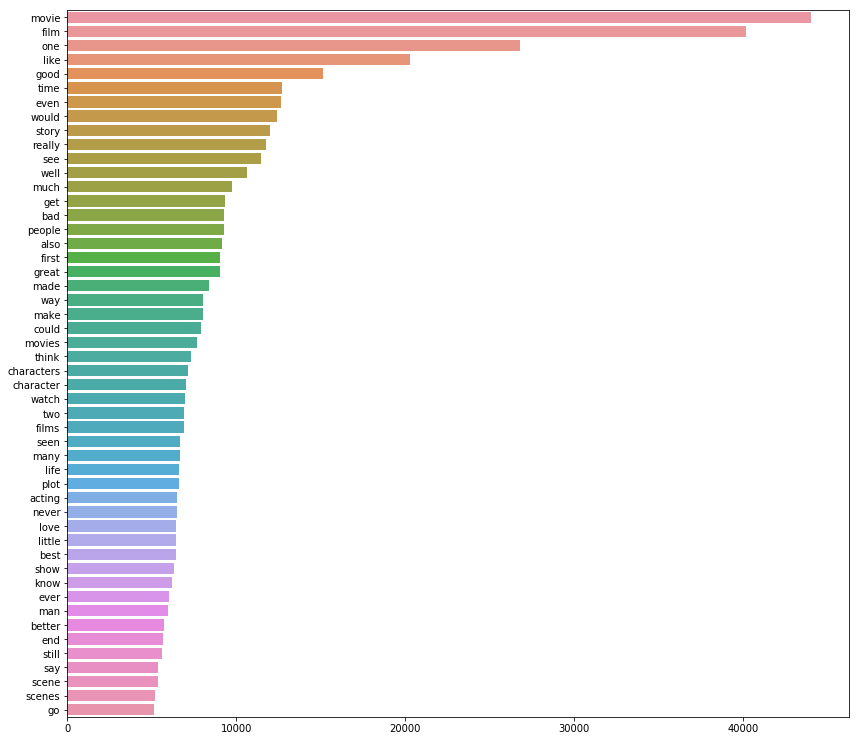

In [70]:
plt.figure(figsize = (14,13))
sns.barplot(x[:50],y[:50]);

## train-predict

In [72]:
X = np.concatenate([train_data_features, np.array(traindf[['textblod-polarity','textblod-subjectivity', 'vaderSentiment-compound',
            'vaderSentiment-neg','vaderSentiment-neu','vaderSentiment-pos']])],axis = 1)
y = np.array(traindf['sentiment'])

In [74]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=325)

rfc = SVC()
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)

print confusion_matrix(y_test,pred)
print '\n'
print classification_report(y_test,pred)

[[2856  842]
 [ 455 3347]]


             precision    recall  f1-score   support

          0       0.86      0.77      0.81      3698
          1       0.80      0.88      0.84      3802

avg / total       0.83      0.83      0.83      7500



In [80]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=325)

rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)

print confusion_matrix(y_test,pred)
print '\n'
print classification_report(y_test,pred)

[[3131  567]
 [ 621 3181]]


             precision    recall  f1-score   support

          0       0.83      0.85      0.84      3698
          1       0.85      0.84      0.84      3802

avg / total       0.84      0.84      0.84      7500



In [79]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
NBC = MultinomialNB()
NBC.fit(X_train[:,:-6],y_train)
pred = NBC.predict(X_test[:,:-6])

print confusion_matrix(y_test,pred)
print '\n'
print classification_report(y_test,pred)

[[3162  536]
 [ 577 3225]]


             precision    recall  f1-score   support

          0       0.85      0.86      0.85      3698
          1       0.86      0.85      0.85      3802

avg / total       0.85      0.85      0.85      7500



***
# Distributed Word Vectors

   Introduced by Google, which will take a text corpus as input and produces the word vectors as output. Intutively, if two words have similar defination, their vector should be close (cosine distance should be small)
   
        word2vec(https://code.google.com/archive/p/word2vec/) | gensim | cython
        
   **To train Word2Vec it is better not to remove stop words because the algorithm relies on the broader context of the sentence in order to produce high-quality word vectors**

In [122]:
# let's train a vector based on original traindata corpus
originalreview = pd.read_csv( "data/labeledTrainData.tsv", header=0, 
                             delimiter="\t", quoting=3 , encoding = 'utf8').review
sentences = map(lambda var: TextBlob(var).sentences, originalreview)

In [197]:
sentencesflat = []
for sen in sentences:
    sentencesflat += map(lambda var: (re.sub("[^a-zA-Z]"," ", str(var))).strip().split(),sen)

In [199]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print "Training model..."
model = word2vec.Word2Vec(sentencesflat, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

2018-04-02 17:42:54,984 : INFO : collecting all words and their counts
2018-04-02 17:42:54,985 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-02 17:42:55,061 : INFO : PROGRESS: at sentence #10000, processed 229498 words, keeping 20367 word types
2018-04-02 17:42:55,111 : INFO : PROGRESS: at sentence #20000, processed 459536 words, keeping 29054 word types
2018-04-02 17:42:55,160 : INFO : PROGRESS: at sentence #30000, processed 682841 words, keeping 35246 word types


Training model...


2018-04-02 17:42:55,217 : INFO : PROGRESS: at sentence #40000, processed 913402 words, keeping 40618 word types
2018-04-02 17:42:55,264 : INFO : PROGRESS: at sentence #50000, processed 1136576 words, keeping 44896 word types
2018-04-02 17:42:55,324 : INFO : PROGRESS: at sentence #60000, processed 1361750 words, keeping 48733 word types
2018-04-02 17:42:55,371 : INFO : PROGRESS: at sentence #70000, processed 1588810 words, keeping 52077 word types
2018-04-02 17:42:55,417 : INFO : PROGRESS: at sentence #80000, processed 1811911 words, keeping 55122 word types
2018-04-02 17:42:55,467 : INFO : PROGRESS: at sentence #90000, processed 2039887 words, keeping 58176 word types
2018-04-02 17:42:55,517 : INFO : PROGRESS: at sentence #100000, processed 2265530 words, keeping 60922 word types
2018-04-02 17:42:55,574 : INFO : PROGRESS: at sentence #110000, processed 2488946 words, keeping 63448 word types
2018-04-02 17:42:55,639 : INFO : PROGRESS: at sentence #120000, processed 2714874 words, keepin

In [202]:
#model.accuracy('https://raw.githubusercontent.com/RaRe-Technologies/gensim/develop/gensim/test/test_data/questions-words.txt')

# what should we do for whole sentence

## 1. Vector Averaging

In [252]:
def makeFeatureVec(words, model, num_features):
    # Function to average all of the word vectors in a given
    # paragraph
    #
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
    #
    nwords = 0.
    # 
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.wv.index2word)
    #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model.wv[word])
    # 
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # 
    # Initialize a counter
    counter = 0
    # 
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    # 
    # Loop through the reviews
    for review in reviews:
        # Print a status message every 1000th review
        if counter%10000 == 0:
            print "Review %d of %d" % (counter, len(reviews))
        # 
        # Call the function (defined above) that makes average feature vectors
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, \
           num_features)
        #
        # Increment the counter
        counter = counter + 1
    return reviewFeatureVecs


In [231]:
originalreview = pd.read_csv( "data/labeledTrainData.tsv", header=0, 
                             delimiter="\t", quoting=3 , encoding = 'utf8').review
sentences = map(lambda var: word_clean(var, remove_stopwords=True), originalreview)
sentences = map(lambda var: var.split(),sentences)

In [253]:
X = getAvgFeatureVecs(sentences,model, num_features)

X = np.concatenate([X, np.array(traindf[['textblod-polarity','textblod-subjectivity', 'vaderSentiment-compound',
            'vaderSentiment-neg','vaderSentiment-neu','vaderSentiment-pos']])],axis = 1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=325)

Review 0 of 25000
Review 10000 of 25000
Review 20000 of 25000


In [257]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)

print confusion_matrix(y_test,pred)
print '\n'
print classification_report(y_test,pred)

[[3073  625]
 [ 554 3248]]


             precision    recall  f1-score   support

          0       0.85      0.83      0.84      3698
          1       0.84      0.85      0.85      3802

avg / total       0.84      0.84      0.84      7500



## 2. Clustering ¶

In [269]:
from sklearn.cluster import KMeans
import time

start = time.time() # Start time

# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an
# average of 5 words per cluster
word_vectors = model.trainables.syn1neg
num_clusters = word_vectors.shape[0] / 5

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print "Time taken for K Means clustering: ", elapsed, "seconds."

Time taken for K Means clustering:  147.568068027 seconds.


In [275]:
# Create a Word / Index dictionary, mapping each vocabulary word to
# a cluster number                                                                                            
word_centroid_map = dict(zip( model.wv.index2word, idx ))

# For the first 10 clusters
for cluster in xrange(0,4):
    #
    # Print the cluster number  
    print "\nCluster %d" % cluster
    #
    # Find all of the words for that cluster number, and print them out
    words = []
    for i in xrange(0,len(word_centroid_map.values())):
        if( word_centroid_map.values()[i] == cluster ):
            words.append(word_centroid_map.keys()[i])
    print words


Cluster 0
['chase']

Cluster 1
['Brendan', 'psychiatrist', 'Dahmer', 'Othello', 'maker', 'adaption', 'Gerard', 'painter', 'editor', 'penned', 'playwright', 'biography', 'journalist', 'novelist', 'Antwone', 'Von', 'Blaise', 'author', 'Luzhin']

Cluster 2
['cream', 'incest', 'r', 'grand', 'smoking', 'cup', 'pot', 'tea']

Cluster 3
['bank', 'dogs', 'gambling', 'spree', 'Marty', 'cattle', 'rob', 'tribe', 'rid', 'collect']


In [276]:
def create_bag_of_centroids( wordlist, word_centroid_map ):
    #
    # The number of clusters is equal to the highest cluster index
    # in the word / centroid map
    num_centroids = max( word_centroid_map.values() ) + 1
    #
    # Pre-allocate the bag of centroids vector (for speed)
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )
    #
    # Loop over the words in the review. If the word is in the vocabulary,
    # find which cluster it belongs to, and increment that cluster count 
    # by one
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    #
    # Return the "bag of centroids"
    return bag_of_centroids

In [279]:
# Pre-allocate an array for the training set bags of centroids (for speed)
train_centroids = np.zeros( (len(sentences), num_clusters), \
    dtype="float32" )

# Transform the training set reviews into bags of centroids
counter = 0
for review in sentences:
    train_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1

In [281]:
X = np.concatenate([train_centroids, np.array(traindf[['textblod-polarity','textblod-subjectivity', 'vaderSentiment-compound',
            'vaderSentiment-neg','vaderSentiment-neu','vaderSentiment-pos']])],axis = 1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=325)
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)

print confusion_matrix(y_test,pred)
print '\n'
print classification_report(y_test,pred)

[[3121  577]
 [ 616 3186]]


             precision    recall  f1-score   support

          0       0.84      0.84      0.84      3698
          1       0.85      0.84      0.84      3802

avg / total       0.84      0.84      0.84      7500



# TF-IDF

In [285]:
def text_preprocess(sentence):
    # 1. Remove HTML
    review_text = BeautifulSoup(sentence).get_text() 
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    # 4. Remove stop words
    stops = set(stopwords.words("english"))                   
    meaningful_words = [w for w in words if not w in stops]   

    return meaningful_words 

In [ ]:
sub = 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
pipeline1 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier(n_estimators=150)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline3 = Pipeline([
    ('bow', CountVectorizer(min_df=3,  max_features=None, 
        strip_accents='unicode', analyzer=text_preprocess,token_pattern=r'\w{1,}',
        ngram_range=(1, 2),  stop_words = 'english')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(penalty='l2', dual=True, tol=0.0001, 
                         C=1, fit_intercept=True, intercept_scaling=1.0, 
                         class_weight=None, random_state=None)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


pipeline4 = Pipeline([('vec', CountVectorizer(
    binary=False,
    tokenizer=lambda text: text.split(),
    max_df=0.5,
    max_features=None,
    stop_words=None,
    ngram_range=(1,2))),
('tfidf', TfidfTransformer(
    norm='l2',
    use_idf=True,
    sublinear_tf=False)),
('clf', MultinomialNB(alpha=0.1))])

In [292]:
msg_train, msg_test, label_train, label_test = train_test_split(traindf.review, traindf.sentiment, 
                                                                test_size=0.3, random_state=325)

pipeline2.fit(msg_train,label_train)
predictions2 = pipeline2.predict(msg_test)
print confusion_matrix(label_test,predictions2)
print 
print classification_report(label_test,predictions2)

[[3209  558]
 [ 539 3194]]

             precision    recall  f1-score   support

          0       0.86      0.85      0.85      3767
          1       0.85      0.86      0.85      3733

avg / total       0.85      0.85      0.85      7500



In [294]:
pipeline1.fit(msg_train,label_train)
predictions1 = pipeline1.predict(msg_test)
print confusion_matrix(label_test,predictions1)
print 
print classification_report(label_test,predictions1)

[[3286  481]
 [ 541 3192]]

             precision    recall  f1-score   support

          0       0.86      0.87      0.87      3767
          1       0.87      0.86      0.86      3733

avg / total       0.86      0.86      0.86      7500



In [309]:
pipeline3.fit(msg_train,label_train)
predictions3 = pipeline3.predict(msg_test)
print confusion_matrix(label_test,predictions3)
print 
print classification_report(label_test,predictions3)

[[3299  468]
 [ 346 3387]]

             precision    recall  f1-score   support

          0       0.91      0.88      0.89      3767
          1       0.88      0.91      0.89      3733

avg / total       0.89      0.89      0.89      7500



In [313]:
pipeline4.fit(msg_train,label_train)
predictions4 = pipeline4.predict(msg_test)
print confusion_matrix(label_test,predictions4)
print 
print classification_report(label_test,predictions4)

[[3310  457]
 [ 401 3332]]

             precision    recall  f1-score   support

          0       0.89      0.88      0.89      3767
          1       0.88      0.89      0.89      3733

avg / total       0.89      0.89      0.89      7500



In [374]:
from sklearn.base import BaseEstimator, TransformerMixin
class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.

    The data is expected to be stored in a 2D data structure, where the first
    index is over features and the second is over samples.  i.e.

    >> len(data[key]) == n_samples

    Please note that this is the opposite convention to scikit-learn feature
    matrixes (where the first index corresponds to sample).

    ItemSelector only requires that the collection implement getitem
    (data[key]).  Examples include: a dict of lists, 2D numpy array, Pandas
    DataFrame, numpy record array, etc.

    >> data = {'a': [1, 5, 2, 5, 2, 8],
               'b': [9, 4, 1, 4, 1, 3]}
    >> ds = ItemSelector(key='a')
    >> data['a'] == ds.transform(data)

    ItemSelector is not designed to handle data grouped by sample.  (e.g. a
    list of dicts).  If your data is structured this way, consider a
    transformer along the lines of `sklearn.feature_extraction.DictVectorizer`.

    Parameters
    ----------
    key : hashable, required
        The key corresponding to the desired value in a mappable.
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

pipeline5 = Pipeline([
        ('union', FeatureUnion(
            transformer_list=[
            ('tfidf_out', Pipeline([
                ('selector', ItemSelector(key='review')),
                ('bow', CountVectorizer(min_df=3,  max_features=None, 
                            strip_accents='unicode', analyzer=text_preprocess,token_pattern=r'\w{1,}',
                            ngram_range=(1, 2),  stop_words = 'english')),  # strings to token integer counts
                ('tfidf', TfidfTransformer())])),
            ('body_bow', Pipeline([
                ('selector', ItemSelector(key=['textblod-polarity','textblod-subjectivity', 'vaderSentiment-compound',
            'vaderSentiment-neg','vaderSentiment-neu','vaderSentiment-pos']))]))],
        )),
        ('classifier', LogisticRegression(penalty='l2', dual=True, tol=0.0001, 
                         C=1, fit_intercept=True, intercept_scaling=1.0, 
                         class_weight=None, random_state=None))  ])
            

In [375]:
msg_train, msg_test, label_train, label_test = train_test_split(traindf, traindf.sentiment, 
                                                                test_size=0.3, random_state=325)

pipeline5.fit(msg_train,label_train)
predictions5 = pipeline5.predict(msg_test)
print confusion_matrix(label_test,predictions5)
print 
print classification_report(label_test,predictions5)

[[3244  454]
 [ 434 3368]]

             precision    recall  f1-score   support

          0       0.88      0.88      0.88      3698
          1       0.88      0.89      0.88      3802

avg / total       0.88      0.88      0.88      7500



### // Adding sentiment as features slightly decrease the accuracy

In [317]:
##### sweezyjeezy solution
def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)



import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
import pandas as pd
import numpy as np

train = pd.read_csv('data/labeledTrainData.tsv', header=0, \
                delimiter="\t", quoting=3)
test = pd.read_csv('data/testData.tsv', header=0, delimiter="\t", \
               quoting=3 )
y = train["sentiment"]  
print "Cleaning and parsing movie reviews...\n"      
traindata = []
for i in xrange( 0, len(train["review"])):
    traindata.append(" ".join(review_to_wordlist(train["review"][i], False)))
testdata = []
for i in xrange(0,len(test["review"])):
    testdata.append(" ".join(review_to_wordlist(test["review"][i], False)))
print 'vectorizing... ', 
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
        strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
        ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1,
        stop_words = 'english')
X_all = traindata + testdata
lentrain = len(traindata)

print "fitting pipeline... ",
tfv.fit(X_all)
X_all = tfv.transform(X_all)

X = X_all[:lentrain]
X_test = X_all[lentrain:]

model = LogisticRegression(penalty='l2', dual=True, tol=0.0001, 
                         C=1, fit_intercept=True, intercept_scaling=1.0, 
                         class_weight=None, random_state=None)
print "20 Fold CV Score: ", np.mean(cross_validation.cross_val_score(model, X, y, cv=20, scoring='roc_auc'))

print "Retrain on all training data, predicting test labels...\n"
model.fit(X,y)
result = model.predict_proba(X_test)[:,1]
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

Cleaning and parsing movie reviews...

vectorizing...  fitting pipeline...  20 Fold CV Score:  0.958320512
Retrain on all training data, predicting test labels...

